<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

**Задача:** разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обосновать корректность его работы.
Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


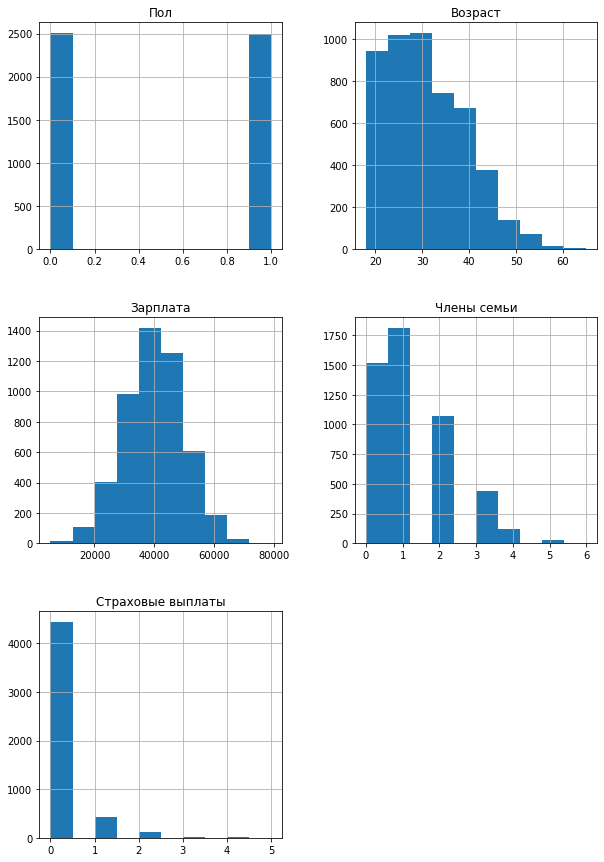

In [3]:
df.hist(figsize=(10, 15))
plt.show()

По предварительному изучению данных, требуется их предобработка.

Следует: 
- Изменить типы данных столбцов "Возраст" и "Зарплата" на int 
- Проверить данные на наличие пропусков и дубликатов


In [4]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


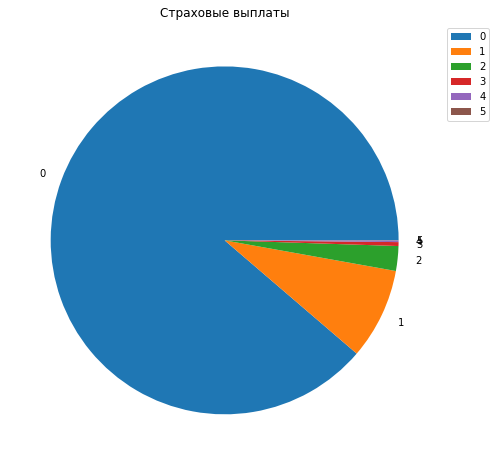

In [5]:
df_str = df.groupby('Страховые выплаты').size()
df_str.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Страховые выплаты")
plt.ylabel("")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

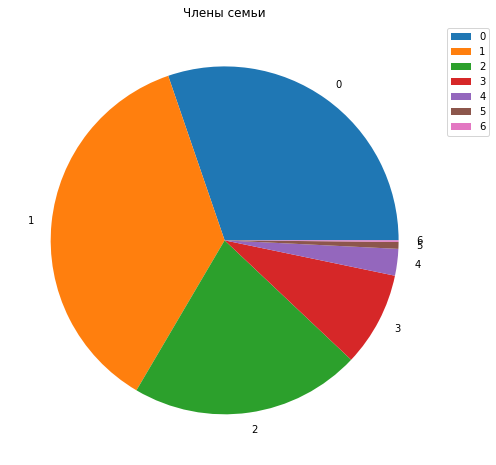

In [6]:
df_fam = df.groupby('Члены семьи').size()
df_fam.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Члены семьи")
plt.ylabel("")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

### Предобработка данных

In [7]:
# изменение типов данных
df['Возраст'] = df['Возраст'].astype('int')
df['Зарплата'] = df['Зарплата'].astype('int')

In [8]:
# Проверка на наличие пропусков
print(df.isna().sum())

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64


In [9]:
# Проверка на наличие дубликатов 
print(df.duplicated().sum())

153


Пропусков не обнаружено.

Число дубликатов мало, по сравнению с числом сторк во всем датасете, поэтому дубликаты можно удалить без особого вреда для исслеования.

In [10]:
df.drop_duplicates(inplace=True)

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?**

**Ответ:** Качество линейной регрессии не изменится

**Обоснование:** 

Создадим новую матрицу признаков путем перемножения текущей матрицы признаков $X$ и обратимой матрицы $P$$$Xp = XP$$

Создадим новый ветор весов: подставим матрицу признаков $XP$ в формулу обучения $$ w_p = ((XP)^T (XP))^{-1} (XP)^T y $$.

Преобразуем вектор весов, используя следующие формулы:
$$
(AB)^T = B^T A^T
$$
$$
(AB)^{-1} = B^{-1} A^{-1}
$$
$$
AA^{-1} = E
$$

Новый вектор весов: 
$$
w_p = ((XP)^T (XP))^{-1} (XP)^T y =
$$

$$
=(P^T X^T X P)^{-1} P^T X^T y = 
$$

$$
=P^{-1}(X^T X)^{-1} (P^T)^{-1} P^T X^T y = 
$$

$$
=P^{-1}(X^T X)^{-1} E X^T y 
$$

$$
w_p = P^{-1} w
$$

Предсказания с использованием новой матицы признаков: 

$$
a_p = X_p w_p = X P P^{-1} w = XEw = Xw = a
$$

Таким образом, умножение матрицы признаков на обратимую матрицу не меняет качества модели линейной регрессии.


## Алгоритм преобразования

Умножение матрицы признаков на обратимую матрицу не меняет качества модели линейной регрессии - это свойство можно использовать для построения алгоритма защиты данных. 

**Алгоритм**
1. **Создание случайной квадратной обратимой матрицы.** Случайно сгенерированная матрица (numpy.random.normal()) с высокой вероятностью окажется обратимой, однако следует это проверить.
2. **Создание новой матрицы признаков** путем перемножения текущей матрицы признаков и обратимой матрицы.
3. **Применение модели линеной регрессии на новых признаках.** 

**Обоснование**

Как описывалось выше, предсказания модели линейной регрессии на старых и новых *(полученных путем перемножения старых признаков на обратимую матрицу)* признаках равны, а значит качество модели так же не меняется.

## Проверка алгоритма

In [11]:
# Тренировочная и тестовая выборки
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=.25, random_state=12345)

print('features_train', features_train.shape,
     '\ntarget_train', target_train.shape,
     '\nfeatures_test', features_test.shape,
     '\ntarget_test',target_test.shape)

features_train (3635, 4) 
target_train (3635,) 
features_test (1212, 4) 
target_test (1212,)


Создадим обратимую матрицу 4*4 (тк в данной задаче 4 признака)

In [12]:
P = np.random.normal(size=(4,4)) 
try:  numpy.linalg.inv(P)
except: P = np.random.normal(size=(4,4)) 

In [13]:
features_train_new = features_train @ P
features_test_new = features_test @ P

print('features_train_new', features_train_new.shape,
     '\nfeatures_test_new', features_test_new.shape)

features_train_new.head()

features_train_new (3635, 4) 
features_test_new (1212, 4)


,0,1,2,3
4599,5849.430247,-444.921157,-35638.388690,13188.559227
3882,5446.823328,-431.365454,-33155.840345,12279.022387
4705,3007.609259,-240.874018,-18311.385899,6782.352915
1400,4172.012377,-352.527234,-25377.789920,9409.930991
728,3494.086872,-295.218510,-21256.590919,7880.881973


Проверим корректно ли происходит дешифровка признаков.

In [14]:
features_train.head()

,Пол,Возраст,Зарплата,Члены семьи
4599,0,28,54500,2
3882,1,38,50700,1
4705,0,24,28000,1
1400,0,47,38800,0
728,0,40,32500,1


In [15]:
(features_train_new @ (np.linalg.inv(P))).head() 

,0,1,2,3
4599,-9.857424e-13,28.0,54500.0,2.000000e+00
3882,1.000000e+00,38.0,50700.0,1.000000e+00
4705,-2.776098e-13,24.0,28000.0,1.000000e+00
1400,-4.225231e-13,47.0,38800.0,-5.188482e-12
728,-6.248150e-13,40.0,32500.0,1.000000e+00


В пределах погрешности, дешифровка происходит корректно.

In [16]:
# Обучение модели и рассчет метрики r2
def r2(features, target):
    model = LinearRegression()
    model.fit(features, target)
    predict = model.predict(features)
    return(r2_score(target, predict))

print("r2 на обучающей выборке:", r2(features_train, target_train))
print("r2 на тестовой выборке:", r2(features_test, target_test))
print("r2 на обучающей выборке с измененными параметрами:", r2(features_train_new, target_train))
print("r2 на тестовой выборке с измененными параметрами:", r2(features_test_new, target_test))

r2 на обучающей выборке: 0.43215820265809746
r2 на тестовой выборке: 0.425552801076332
r2 на обучающей выборке с измененными параметрами: 0.4321582026580981
r2 на тестовой выборке с измененными параметрами: 0.4255528010763313


Метрика r2 выдает практически одинаковые зачения для модели как до преобразования признаков, так и после их преобразования.

## Вывод

В ходе работы над проектом была проведена предобработка данных:
- Изменены типы столбцов "Возраст" и "Зарплата"
- Удалены дубликаты

Проеденно исследование изменения качества линейной регрессии, в ходе которого было получено, что **перемножение матрицы признаков и обратимой матрицы не меняет качества модели линейной регрессии.**

Предложен алгоритм преобразования данных для их защиты. Основные этапы алгоритма:

1. Создание случайной квадратной обратимой матрицы
2. Создание новой матрицы признаков
3. Применение модели линеной регрессии на новых признаках

Проведено сравнение метрики R2 для моделей начальными и измененными признаками. Метрика выдает практически одинаковые значения как до преобразования признаков, так и после их преобразования, что подтверждает вышеуказаное утверждение о неизменности качества модели линейной регрессии.